In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [3]:
## read data file
sal_dataset = pd.read_csv(r"D:\Learning_Projects\Machine_Learning_Full_Course_Edureka\DataSets\Salary_Data.csv")
sal_dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
## Number of rows and columns
sal_dataset.shape

(6704, 6)

In [5]:
# List of Columns
sal_dataset.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [6]:
# Renaming of Columns
sal_dataset.columns=['Age','Gender','Education_Level','Job_Title','Years_of_Experience','Salary']
sal_dataset.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
sal_dataset.dtypes

Age                    float64
Gender                  object
Education_Level         object
Job_Title               object
Years_of_Experience    float64
Salary                 float64
dtype: object

In [8]:
## Information of dataset
sal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education_Level      6701 non-null   object 
 3   Job_Title            6702 non-null   object 
 4   Years_of_Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [9]:
sal_dataset[sal_dataset.duplicated()]

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [11]:
print(sal_dataset[sal_dataset.duplicated()].shape)

(4912, 6)


In [13]:
## Dropping duplicate data from dataset
salary_dataset = sal_dataset.drop_duplicates(keep = 'first')
print(salary_dataset.shape)

(1792, 6)


In [15]:
## Missing / Null values in dataset
print(salary_dataset.isnull().sum())

Age                    1
Gender                 1
Education_Level        2
Job_Title              1
Years_of_Experience    2
Salary                 4
dtype: int64


In [16]:
## dropping missing values from data
salary_dataset.dropna(how='any' , inplace = True)

C:\Users\aayus\AppData\Local\Temp\ipykernel_7864\263273962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_dataset.dropna(how='any' , inplace = True)


In [18]:
## Size of data after dropping duplicate and null values
print(salary_dataset.shape)

(1787, 6)


## Data Exploration and Visualization

In [19]:
salary_dataset.describe()

,Age,Years_of_Experience,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.139899,9.156128,113184.659765
std,8.213045,6.844924,51596.536766
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [20]:
corr = salary_dataset[['Age','Years_of_Experience','Salary']].corr()
corr

,Age,Years_of_Experience,Salary
Age,1.000000,0.936260,0.766841
Years_of_Experience,0.936260,1.000000,0.818725
Salary,0.766841,0.818725,1.000000


<Axes: >

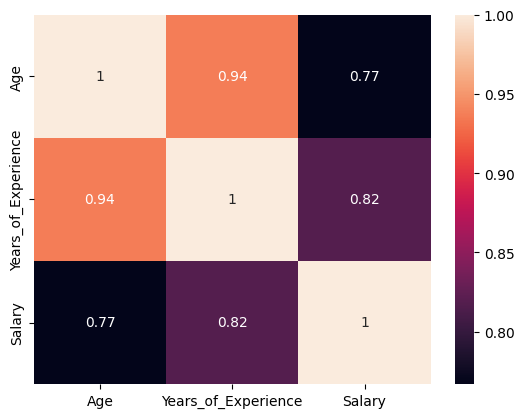

In [21]:
import seaborn as sns
sns.heatmap(corr, annot=True)

## Feature Engineering

#### Label Encoding:

In [23]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [25]:
salary_dataset['Gender_Encode'] = Label_Encoder.fit_transform(salary_dataset['Gender'])

C:\Users\aayus\AppData\Local\Temp\ipykernel_7864\2495522005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_dataset['Gender_Encode'] = Label_Encoder.fit_transform(salary_dataset['Gender'])


In [27]:
salary_dataset.loc[:, 'Gender_Encode'] = Label_Encoder.fit_transform(salary_dataset['Gender'])
print(salary_dataset)

       Age  Gender    Education_Level                  Job_Title  \
0     32.0    Male         Bachelor's          Software Engineer   
1     28.0  Female           Master's               Data Analyst   
2     45.0    Male                PhD             Senior Manager   
3     36.0  Female         Bachelor's            Sales Associate   
4     52.0    Male           Master's                   Director   
...    ...     ...                ...                        ...   
6623  43.0  Female    Master's Degree  Digital Marketing Manager   
6624  27.0    Male        High School              Sales Manager   
6625  33.0  Female  Bachelor's Degree      Director of Marketing   
6628  37.0    Male  Bachelor's Degree             Sales Director   
6631  30.0  Female  Bachelor's Degree              Sales Manager   

      Years_of_Experience    Salary  Gender_Encode  
0                     5.0   90000.0              1  
1                     3.0   65000.0              0  
2                    15.

In [30]:
salary_dataset['Education_Level_Encode'] = Label_Encoder.fit_transform(salary_dataset['Education_Level'])

C:\Users\aayus\AppData\Local\Temp\ipykernel_7864\664588222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_dataset['Education_Level_Encode'] = Label_Encoder.fit_transform(salary_dataset['Education_Level'])


In [31]:
salary_dataset.loc[:,'Education_Level_Encode'] = Label_Encoder.fit_transform(salary_dataset['Education_Level'])
print(salary_dataset)

       Age  Gender    Education_Level                  Job_Title  \
0     32.0    Male         Bachelor's          Software Engineer   
1     28.0  Female           Master's               Data Analyst   
2     45.0    Male                PhD             Senior Manager   
3     36.0  Female         Bachelor's            Sales Associate   
4     52.0    Male           Master's                   Director   
...    ...     ...                ...                        ...   
6623  43.0  Female    Master's Degree  Digital Marketing Manager   
6624  27.0    Male        High School              Sales Manager   
6625  33.0  Female  Bachelor's Degree      Director of Marketing   
6628  37.0    Male  Bachelor's Degree             Sales Director   
6631  30.0  Female  Bachelor's Degree              Sales Manager   

      Years_of_Experience    Salary  Gender_Encode  Education_Level_Encode  
0                     5.0   90000.0              1                       0  
1                     3.0   6

In [141]:
salary_dataset['Job_Title_Encode'] = Label_Encoder.fit_transform(salary_dataset['Job_Title'])

C:\Users\sandeep\AppData\Local\Temp\ipykernel_16104\2824884935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_dataset['Job_Title_Encode'] = Label_Encoder.fit_transform(salary_dataset['Job_Title'])


In [33]:
salary_dataset.loc[:,'Job_Title_Encode'] = Label_Encoder.fit_transform(salary_dataset['Job_Title'])
print(salary_dataset)

       Age  Gender    Education_Level                  Job_Title  \
0     32.0    Male         Bachelor's          Software Engineer   
1     28.0  Female           Master's               Data Analyst   
2     45.0    Male                PhD             Senior Manager   
3     36.0  Female         Bachelor's            Sales Associate   
4     52.0    Male           Master's                   Director   
...    ...     ...                ...                        ...   
6623  43.0  Female    Master's Degree  Digital Marketing Manager   
6624  27.0    Male        High School              Sales Manager   
6625  33.0  Female  Bachelor's Degree      Director of Marketing   
6628  37.0    Male  Bachelor's Degree             Sales Director   
6631  30.0  Female  Bachelor's Degree              Sales Manager   

      Years_of_Experience    Salary  Gender_Encode  Education_Level_Encode  \
0                     5.0   90000.0              1                       0   
1                     3.0  

In [35]:
print(salary_dataset.head())

    Age  Gender Education_Level          Job_Title  Years_of_Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  Gender_Encode  Education_Level_Encode  Job_Title_Encode  
0   90000.0              1                       0               175  
1   65000.0              0                       3                18  
2  150000.0              1                       5               144  
3   60000.0              0                       0               115  
4  200000.0              1                       3                25  


### Feature Scaling


In [36]:
## standardization the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
salary_dataset['Age_scaled'] = scaler.fit_transform(salary_dataset[['Age']])
salary_dataset['Years_of_Experience_scaled']= scaler.fit_transform(salary_dataset[['Years_of_Experience']])

C:\Users\aayus\AppData\Local\Temp\ipykernel_7864\2992553304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_dataset['Age_scaled'] = scaler.fit_transform(salary_dataset[['Age']])
C:\Users\aayus\AppData\Local\Temp\ipykernel_7864\2992553304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_dataset['Years_of_Experience_scaled']= scaler.fit_transform(salary_dataset[['Years_of_Experience']])


In [38]:
salary_dataset.loc[:,'Age_scaled'] = scaler.fit_transform(salary_dataset[['Age']])
salary_dataset.loc[:,'Years_of_Experience_scaled']= scaler.fit_transform(salary_dataset[['Years_of_Experience']])

In [40]:
## Data after scaling
print(salary_dataset.head())

    Age  Gender Education_Level          Job_Title  Years_of_Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  Gender_Encode  Education_Level_Encode  Job_Title_Encode  \
0   90000.0              1                       0               175   
1   65000.0              0                       3                18   
2  150000.0              1                       5               144   
3   60000.0              0                       0               115   
4  200000.0              1                       3                25   

   Age_scaled  Years_of_Experience_scaled  
0   -0.382413                   -0.607354  
1   -0.869580               

In [41]:
#Independent (X) and Dependent (y) Features
X=salary_dataset[['Age_scaled','Gender_Encode','Education_Level_Encode','Job_Title_Encode','Years_of_Experience_scaled']]
y = salary_dataset['Salary']

In [42]:
print(X.head())

   Age_scaled  Gender_Encode  Education_Level_Encode  Job_Title_Encode  \
0   -0.382413              1                       0               175   
1   -0.869580              0                       3                18   
2    1.200878              1                       5               144   
3    0.104753              0                       0               115   
4    2.053419              1                       3                25   

   Years_of_Experience_scaled  
0                   -0.607354  
1                   -0.899623  
2                    0.853992  
3                   -0.315085  
4                    1.584664  


### Splitting the data into Training and Testing

In [45]:
## train test slpit
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape)  ## 80% data

(1429, 5)


In [46]:
X_test.shape  ## 20% data

(358, 5)

### Model Development

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
Linear_regression_model = LinearRegression()

### Model Training

In [49]:
Linear_regression_model.fit(X_train,y_train)

LinearRegression()

### Model Predictions

In [50]:
y_pred = Linear_regression_model.predict(X_test)
y_pred

array([125536.35843932,  85316.87469159,  73763.18160738,  96361.38570935,
       131496.19432314, 159555.14893783, 110906.74660225,  94207.18927313,
        63067.85473362,  71627.34841546,  61577.89576766,  83462.0511769 ,
       180916.38997886, 185007.79435995, 118355.69166643, 165179.85953083,
       134335.62131114,  55868.7013756 ,  76796.90439402, 192247.2781631 ,
       109029.62005058,  62317.41638132, 144633.492761  ,  73787.13125319,
       143958.08248771, 142673.19507786, 100712.32145901,  68952.34436974,
        96908.88703365, 124899.64682199,  82427.63648112,  61108.59140632,
        95676.18292697,  97178.7062404 , 129025.15696354,  88696.84272538,
        60343.84652629, 112629.16099607,  57486.29655871, 131058.89734627,
        56750.59980673,  78251.20927423,  63935.64887471, 162879.48649275,
       108094.04109845,  72620.47718713,  61084.99567271,  89572.51744471,
       158594.1054546 , 122614.69813137, 111188.9604059 , 147543.00614661,
        98020.63880484,  

In [51]:
df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': y_pred})
df['Error'] = df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
1299,155000.0,125536.358439,29463.641561,29463.641561
3429,55000.0,85316.874692,-30316.874692,30316.874692
4529,50000.0,73763.181607,-23763.181607,23763.181607
305,95000.0,96361.385709,-1361.385709,1361.385709
6606,130000.0,131496.194323,-1496.194323,1496.194323
...,...,...,...,...
2557,194214.0,232093.496397,-37879.496397,37879.496397
1294,170000.0,125110.446761,44889.553239,44889.553239
683,195000.0,116470.819108,78529.180892,78529.180892
2583,179987.0,199566.010000,-19579.010000,19579.010000


In [53]:
Mean_absolute_error = df['abs_error'].mean()
print(Mean_absolute_error)

23098.038367719786


In [54]:
### Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Model Accuracy

In [57]:
print(y_test,y_pred)

1299    155000.0
3429     55000.0
4529     50000.0
305      95000.0
6606    130000.0
          ...   
2557    194214.0
1294    170000.0
683     195000.0
2583    179987.0
5002    120000.0
Name: Salary, Length: 358, dtype: float64 [125536.35843932  85316.87469159  73763.18160738  96361.38570935
 131496.19432314 159555.14893783 110906.74660225  94207.18927313
  63067.85473362  71627.34841546  61577.89576766  83462.0511769
 180916.38997886 185007.79435995 118355.69166643 165179.85953083
 134335.62131114  55868.7013756   76796.90439402 192247.2781631
 109029.62005058  62317.41638132 144633.492761    73787.13125319
 143958.08248771 142673.19507786 100712.32145901  68952.34436974
  96908.88703365 124899.64682199  82427.63648112  61108.59140632
  95676.18292697  97178.7062404  129025.15696354  88696.84272538
  60343.84652629 112629.16099607  57486.29655871 131058.89734627
  56750.59980673  78251.20927423  63935.64887471 162879.48649275
 108094.04109845  72620.47718713  61084.99567271  89572.51

In [239]:
#print(f'Accuracy of the model = {round(r2_score(y_test,y_pred),4)*100} %')

#### Cross validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [60]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [62]:
print(np.mean(mse))

-776501955.2413157


In [63]:
## prediction
reg_pred= regression.predict(X_test)
print(reg_pred)

[125536.35843932  85316.87469159  73763.18160738  96361.38570935
 131496.19432314 159555.14893783 110906.74660225  94207.18927313
  63067.85473362  71627.34841546  61577.89576766  83462.0511769
 180916.38997886 185007.79435995 118355.69166643 165179.85953083
 134335.62131114  55868.7013756   76796.90439402 192247.2781631
 109029.62005058  62317.41638132 144633.492761    73787.13125319
 143958.08248771 142673.19507786 100712.32145901  68952.34436974
  96908.88703365 124899.64682199  82427.63648112  61108.59140632
  95676.18292697  97178.7062404  129025.15696354  88696.84272538
  60343.84652629 112629.16099607  57486.29655871 131058.89734627
  56750.59980673  78251.20927423  63935.64887471 162879.48649275
 108094.04109845  72620.47718713  61084.99567271  89572.51744471
 158594.1054546  122614.69813137 111188.9604059  147543.00614661
  98020.63880484  99669.87679397 110999.17121607 149538.24172834
 165363.77094696 195622.93441594 118391.78823459  55573.02059219
 114078.83592664  89436.363

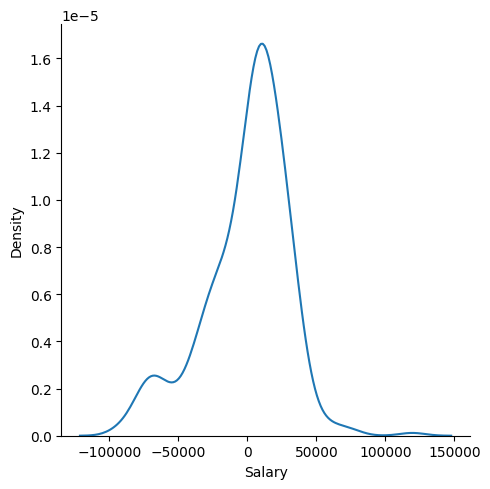

In [64]:
sns.displot(reg_pred-y_test,kind='kde')

In [65]:
from sklearn.metrics import r2_score

In [67]:
score =r2_score(reg_pred,y_test)

In [69]:
print(score)

0.5136037097824435
